# ¿Tienen futuro en la NBA?

A continuación vamos a trabajar con un [dataset] que contiene varias estadísticas sobre el año de Rookie (primer año) en la NBA de varios jugadores. A partir de estos, debemos predecir si los jugadores van a durar o no más de 5 años en la liga.

Esto consiste en un problema de clasificación binaria, para lo que los datos vienen etiquetados acorde a si el jugador logra ('**1**') o no logra ('**2**') superar ese período en la NBA.

Comenzemos cargando el archivo descargado, importando para esto las bibliotecas necesarias.

In [10]:
import pandas as pd
import numpy as np

# cargamos el archivo separado por comas
nba_csv_values = pd.read_csv('../datasets/nba_logreg.csv')

nba_csv_values.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [27]:
# convertimos la columna de nombres en índice
df_nba = nba_csv_values.set_index(nba_csv_values['Name']).drop(columns='Name', axis=1)

# Almacenamos los nombres y las features por separado
Names = df_nba.index.to_list()
Features = df_nba.columns.to_list()[:-1]

df_nba.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
Name,,,,,,,,,,,,,,,,,,,,
Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


Con el `DataFrame` `df_nba` acomodamos los datos cargados, teniendo los nombres de los jugadores en el índice, y en las columnas, sus estadísticas y su etiqueta de clase (los que duraron o no más de 5 años).

A continuación generamos un diccionario para almacenar cada feature con su índice de columna. Estas corresponden a:

<ul>
    <li>Cantidad de partidos jugados, minutos y puntos promedio por partido: <b>GP</b>, <b>MIN</b> y <b>PTS</b>.</li>
    <li>Promedio de tiros de campo intentados, hechos, y porcentaje por partido: <b>FGA</b>, <b>FGM</b> y <b>FG%</b>.</li>
    <li>Promedio de tiros de 3 puntos intentados, hechos, y porcentaje por partido: <b>3PA</b>, <b>3P Made</b> y <b>3PG%</b>.</li>
    <li>Promedio de tiros libres intentados, hechos, y porcentaje por partido: <b>FTA</b>, <b>FTM</b> y <b>FT%</b>.</li>
    <li>Promedio de rebotes ofensivos, defensivos y totales: <b>OREB</b>, <b>DREB</b> y <b>REB</b>.</li>
    <li>Asistencias, robos, bloqueos y pérdidas promedio por partido.<b>AST</b>, <b>STL</b>, <b>BLK</b> y <b>TOV</b>.</li>
</ul>

In [28]:
dict_feat = {}
for k, v in enumerate(Features):
    dict_feat[v] = k
    
dict_feat

{'GP': 0,
 'MIN': 1,
 'PTS': 2,
 'FGM': 3,
 'FGA': 4,
 'FG%': 5,
 '3P Made': 6,
 '3PA': 7,
 '3P%': 8,
 'FTM': 9,
 'FTA': 10,
 'FT%': 11,
 'OREB': 12,
 'DREB': 13,
 'REB': 14,
 'AST': 15,
 'STL': 16,
 'BLK': 17,
 'TOV': 18}

In [29]:
abcl = ['a', 'b']
nl = [1, 2]
for char in abcl:
    for num in nl:
        print(char, num)

a 1
a 2
b 1
b 2


## 1. Preprocesamiento de los datos

Veamos si la lista contiene únicamente entradas únicas:

In [30]:
len(Names) == len(set(Names))

False

La salida de la celda anterior indica que hay al menos una entrada repetida en los nombres incluídos, por esto determinamos quedarnos con las que no se repiten. 

A continuación recorremos el `DataFrame` recursivamente y eliminamos las filas ya vistas.

In [31]:
print(f'Cantidad original de ejemplos: {len(df_nba)}.\nEliminando ejemplos duplicados ...\n')

names_list = []
duplicates_index = []

for i in np.arange(len(df_nba)):
    name = df_nba.index[i]
    if name not in names_list:
        names_list.append(name)
    else:
        duplicates_index.append(i)
        print(f'Entrada duplicada: {name}')
        
df_nba.drop(df_nba.index[duplicates_index], axis=0, inplace=True)

print(f'\nEjemplos duplicados eliminados.\nCantidad de ejemplos únicos: {len(df_nba)}')

Cantidad original de ejemplos: 1340.
Eliminando ejemplos duplicados ...

Entrada duplicada: Larry Johnson
Entrada duplicada: Dee Brown
Entrada duplicada: Dee Brown
Entrada duplicada: Dee Brown
Entrada duplicada: Tim Hardaway
Entrada duplicada: Glen Rice
Entrada duplicada: Michael Smith
Entrada duplicada: Michael Smith
Entrada duplicada: Michael Smith
Entrada duplicada: Charles Smith
Entrada duplicada: Charles Smith
Entrada duplicada: Charles Smith
Entrada duplicada: Charles Smith
Entrada duplicada: Charles Smith
Entrada duplicada: Charles Smith
Entrada duplicada: Charles Smith
Entrada duplicada: Charles Smith
Entrada duplicada: Michael Anderson
Entrada duplicada: Mark Bryant
Entrada duplicada: Mark Davis
Entrada duplicada: Mark Davis
Entrada duplicada: Mark Davis
Entrada duplicada: Reggie Williams
Entrada duplicada: Bob Martin
Entrada duplicada: Ken Johnson
Entrada duplicada: Charles Jones
Entrada duplicada: Charles Jones
Entrada duplicada: Charles Jones
Entrada duplicada: Charles Jone

Luego, comprobamos de que la operación se haya realizado correctamente.

In [32]:
Names = df_nba.index
len(Names) == len(set(Names))

True

Hay celdas con valores `NaN` en nuestro `DataFrame` ?

In [33]:
df_nba.isna().groupby('3P%').count()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
3P%,,,,,,,,,,,,,,,,,,,
False,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256,1256
True,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


Como vemos, hay 9 celdas con valores `NaN` para el porcentaje de tiros de 3 puntos hechos por partido. Analizemos uno de los ejemplos:

In [34]:
na_names = df_nba.index[df_nba['3P%'].isna() == True]
df_nba.loc[na_names[7]]

GP             72.0
MIN            11.9
PTS             2.9
FGM             1.2
FGA             2.3
FG%            50.9
3P Made         0.0
3PA             0.0
3P%             NaN
FTM             0.5
FTA             1.2
FT%            45.9
OREB            1.0
DREB            1.5
REB             2.5
AST             0.6
STL             0.3
BLK             0.7
TOV             0.7
TARGET_5Yrs     0.0
Name: Jim Smith, dtype: float64

Por lo que puede verse, el hecho de que estas celdas contengan valores `NaN` es porque no se registraron intentos de 3 puntos para los jugadores.

Se opta reemplazar estas celdas por el promedio de todos los jugadores restantes, dado que se busca que esta feature (en los jugadores que no la registran) tenga poca importancia.

In [35]:
df_nba['3P%'].mean()
df_nba.loc[na_names,'3P%'] = 0.0

## 2. Visualización de datos

A continuación, mostramos histogramas para cada uno de los atributos en el `DataFrame`:

In [36]:
# importamos bibliotecas para graficar y editamos estilo
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
style_mod = {'figure.figsize': (10,6), 'font.size': 14,
            'axes.linewidth': '1', 'axes.edgecolor': 'k',
            'lines.linewidth': 2}
for key, value in style_mod.items():
    plt.rcParams[key] = value

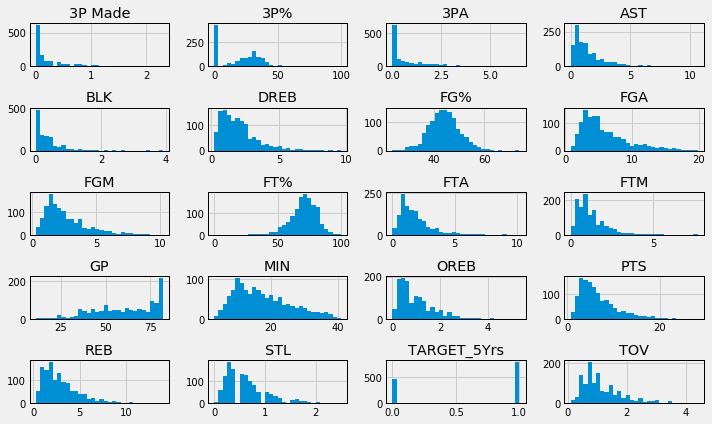

In [37]:
plt.rcParams['font.size'] = 10

# 30 bins por cada atributo
axs = df_nba.hist(bins=30)

plt.tight_layout()
plt.rcParams['font.size'] = 14;

Como vemos, las variables se encuentran dispersas dentro de sus rangos, salvo para la etiqueta de clase.

La mayoría de atributos se encuentran sesgadas, por ejemplo atributos como los bloqueos, las asistencias, y los relativos a 3 puntos, suelen tener mayor cantidad de ocurrencias en valores bajos.

# 3. División de los datos

A continuación, separamos el `DataFrame` en la matriz de diseño **X**, y las etiquetas **y**. Luego, divimos los datos en un 70% para entrenamiento y un 30% para prueba. No se obtiene una partición de validación dado que se utilizará *cross validation* para ajustar los hiperparámetros de los modelos de ML.

Se imprimen la cantidad de muestras para cada una de las clases, y la cantidad de muestra resultante en los sets de entrenamiento y prueba.

In [38]:
from sklearn.model_selection import train_test_split

# pasamos el dataframe a un array de numpy
dataset_raw = df_nba.to_numpy()

# separamos atributos y etiquetas
X, y = dataset_raw[:,:-1], dataset_raw[:,-1]
print(f'Elementos por clase:\n\nClase 0: {np.sum(y == 0)}\nClase 1: {np.sum(y == 1)}')

# obtenemos de forma estratificada los sets de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

print(f'\n{len(y_train)} muestras para entrenamiento, {len(y_test)} muestras para test.')

Elementos por clase:

Clase 0: 475
Clase 1: 790

885 muestras para entrenamiento, 380 muestras para test.


# 4. Selección y entrenamiento de los modelos

Determinamos utilizar tres modelos distintos: `RandomForestClassifier`, `SVC` y `KNeighborsClassifier`.

Estos representan topologías diferentes de modelos. A continuación importamos los modelos, y realizamos el proceso de *model selection*, esto es, elegimos distintos parámetros y nos quedamos con los que obtengamos mejores resultados para cada tipo de modelo. Utilizamos para esto la función `GridSearchCV()`, que prueba el modelo para cada combinación posible de parámetros, evaluándolos a través de *cross validation*. Se elige una división en 5 sets, con lo que cada modelo se entrena con 3/4 con los datos de `X_train`, y se evalua con el 1/4 restante.

Se determina elegir los modelos de acuerdo a la métrica *precision*, la cual considera los *falsos positivos* cometidos. Estos errores se consideran de mayor relevancia, dado que implicaría estimar que un jugador superará los 5 años jugando la NBA cuando esto no sucedió. Si estuviesemos asesorando a un equipo de la NBA, lo peor sería errar en este sentido.

In [39]:
import warnings 
warnings.filterwarnings(action='ignore')

# importamos los modelos a evaluar
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# GridSearch con cross validation para model selection
from sklearn.model_selection import GridSearchCV

# vamos a validar respecto al Precision
scoring = 'precision'

#
# MODELO 1
#
# elegimos el modelo
print('Support Vector Classification\n' + 15*('-'))
model = SVC(max_iter=5000, random_state=10, probability=True)
svc_params = {'C': 10.0**np.arange(-5,6),
             'kernel': ('linear', 'rbf')}

# realizamos model selection
classifier = GridSearchCV(model, svc_params, scoring=scoring, cv=5)
classifier.fit(X_train, y_train)

# imprimimos los resultaods
print('\nMáxima precisión obtenida: ', classifier.best_score_)
print('Mejores parámetro: ', classifier.best_params_)
# nos quedamos con el mejor
svc = classifier.best_estimator_
svc_results = classifier.cv_results_['mean_test_score']
svc_res_params = classifier.cv_results_['params']

#
## MODELO 2
#
# elegimos el modelo
print('\nRandom Forest Classifier\n' + 15*('-'))
model = RandomForestClassifier(oob_score=True, random_state=10)
rfc_params = {'n_estimators': (10, 30, 50, 100, 250, 500)}

# realizamos model selection
classifier = GridSearchCV(model, rfc_params, scoring=scoring, cv=5)
classifier.fit(X_train, y_train)

# imprimimos los resultaods
print('\nMáxima precisión obtenida: ', classifier.best_score_)
print('Mejor parámetro: ', classifier.best_params_)
# nos quedamos con el mejor
rfc = classifier.best_estimator_
rfc_results = classifier.cv_results_['mean_test_score']

#
## MODELO 3
#
# elegimos el modelo
print('\nK Neighbors Classifier\n' + 15*('-'))
model = KNeighborsClassifier()
knc_params = {'n_neighbors': (1, 3, 7, 12, 18, 25, 40)}

# realizamos model selection
classifier = GridSearchCV(model, knc_params, scoring=scoring, cv=5)
classifier.fit(X_train, y_train)

# imprimimos los resultaods
print('\nMáxima precisión obtenida: ', classifier.best_score_)
print('Mejor parámetro: ', classifier.best_params_)
# nos quedamos con el mejor
knc = classifier.best_estimator_
# guardamos los resultados
knc_results = classifier.cv_results_['mean_test_score']

Support Vector Classification
---------------

Máxima precisión obtenida:  0.745964856399639
Mejores parámetro:  {'C': 0.01, 'kernel': 'linear'}

Random Forest Classifier
---------------

Máxima precisión obtenida:  0.7536070052803201
Mejor parámetro:  {'n_estimators': 30}

K Neighbors Classifier
---------------

Máxima precisión obtenida:  0.7542610310313534
Mejor parámetro:  {'n_neighbors': 12}


## 5. Análisis de los modelos

Como vemos, la métrica *precision* obtenida para los tres mejores modelos es ~ 0.75.

A continuación, mostramos la evolución de esta métrica para cada valor de hiperparámetro probado.

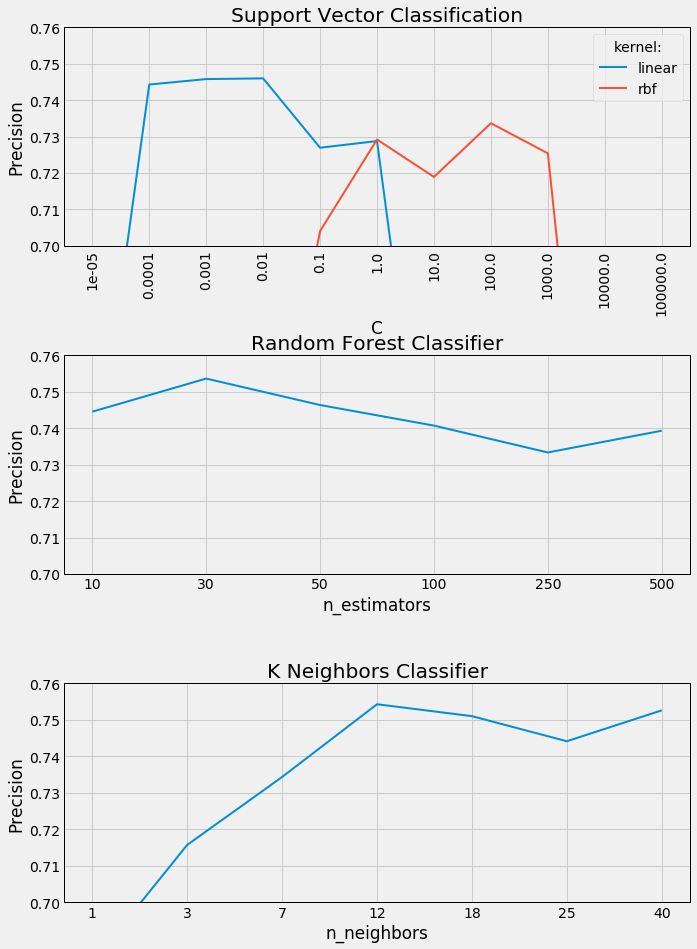

In [51]:
figs, axs = plt.subplots(3,1, figsize=(10,15))

# SVC
axs[0].plot(svc_results[0::2], label=svc_res_params[0]['kernel'])
axs[0].plot(svc_results[1::2], label=svc_res_params[1]['kernel'])
axs[0].set_title('Support Vector Classification')
axs[0].set_xticks(np.arange(len(svc_results[::2])))
axs[0].set_xticklabels([svc_res_params[i]['C'] for i in np.arange(0, len(svc_res_params), 2)], rotation=90)
axs[0].set_xlabel('C')
axs[0].set_ylabel('Precision')
axs[0].set_ylim([0.7, 0.76])
axs[0].legend(title='kernel:')

axs[0].plot
# RFC
axs[1].plot(rfc_results)
axs[1].set_title('Random Forest Classifier')
axs[1].set_xticks(np.arange(len(rfc_results)))
axs[1].set_xticklabels(list(*rfc_params.values()))
axs[1].set_xlabel(*rfc_params.keys())
axs[1].set_ylabel('Precision')
axs[1].set_ylim([0.7, 0.76])

# KNC
axs[2].plot(knc_results)
axs[2].set_title('K Neighbors Classifier')
axs[2].set_xticks(np.arange(len(knc_results)))
axs[2].set_xticklabels(list(*knc_params.values()))
axs[2].set_xlabel(*knc_params.keys())
axs[2].set_ylabel('Precision')
axs[2].set_ylim([0.7, 0.76])

figs.subplots_adjust(hspace=0.5);

Es interesante ver que para el `SVC`, el *linear kernel* muestra un mejor resultado casi sin regularización, cumpliéndose lo opuesto para el *kernel rbf*. Para el modelo `RandomForestClassifier`, se obtiene un rendimiento similar con distinta cantidad de árboles, siendo mayor para 30.

En el `KNeighborsClassifier` los resultados mejoran, como es de esperarse, con la cantidad de vecinos considerados. 12 es el valor óptimo, dado que el tiempo de procesamiento aumenta con la cantidad de vecinos a considerar, y que  se El mejor resultado se obtien El se obtienen mejores resultados para mayor cantidad de 

### 5.1 Feature importance - Random Forest Classifier

El modelo `Random Forest` permite evaluar la importancia relativa que tuvieron las features para las predicciones que realiza.

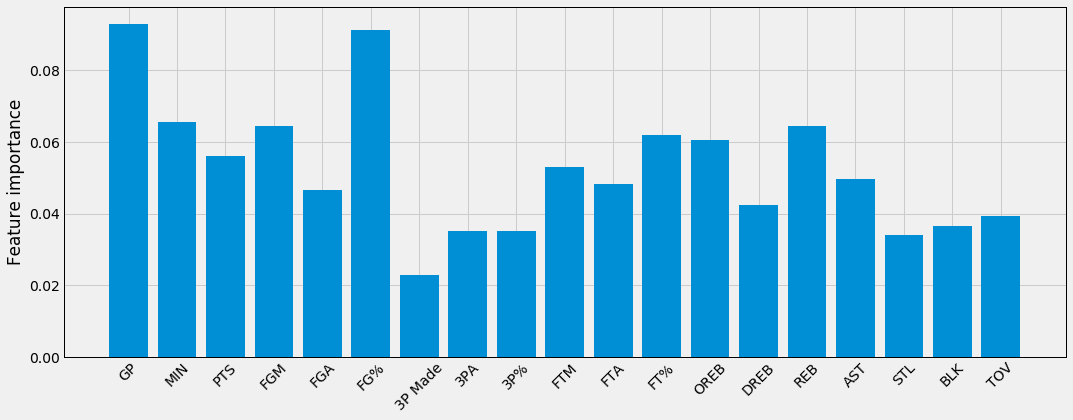

In [41]:
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(np.arange(len(rfc.feature_importances_)), rfc.feature_importances_)
ax.set_ylabel('Feature importance')
ax.set_xticks(np.arange(len(rfc.feature_importances_)))
ax.set_xticklabels(list(df_nba.columns), rotation=45);

Esto nos permite ver que la cantidad de partidos que llegó a jugar el Rookie, y su porcentaje de tiros de campo, son los parámetros más importantes al evaluar si llegará o no a cumplir 5 años en la liga. Por otro lado, podemos ver que los atributos sobre los triples que metió (su cantidad, particularmente), y los robos y bloqueos que hizo, son los parámetros de menor relevancia.

El hecho de que existan diversos atributos sobre la misma característica, permite considerar a futuro la posibilidad de eliminar ciertas features.

Veamos cómo se relacionan los dos atributos más relevantes, la cantidad  de partidos 

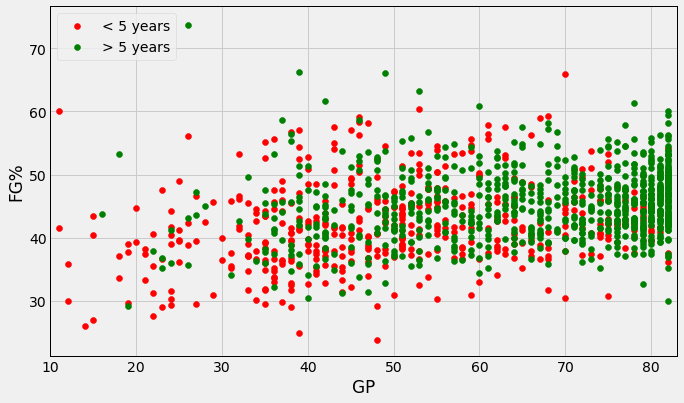

In [42]:
fig, ax = plt.subplots()

var_x = 'GP'
var_y = 'FG%'

# asignamos colores y labels a cada categoría
cdict = {0: 'r', 1: 'g'}
ldict = {0: '< 5 years', 1: '> 5 years'}

# ploteamos por separado para cada categoría
for group in (0, 1):
    idx = np.where(y==group)
    ax.scatter(X[idx, dict_feat[var_x]], X[idx, dict_feat[var_y]], c=cdict[group], label=ldict[group])

ax.set_xlabel(var_x)
ax.set_ylabel(var_y)
ax.set_xlim([10, 83])
ax.legend(loc='upper left')

Se puede observar claramente que los grupos de cada categoría tienden a ubicarse en lugares diferentes en el gráfico. Podemos ver que la mayoría de jugadores con un porcentaje de tiros de campo menor al 35%, y con menos de 35 partidos jugados no jugaron mas de 5 años en la NBA. Mientras que, a mayor cantida de partidos jugados, mayor es la proporción de jugadores que sí lo lograron.

## 6. Análisis de resultados

A continación evaluamos a los modelos para datos nuevos, al utilizar el set de datos de prueba.

### 6.1 Evaluación con los datos originales

#### Matriz de confusión


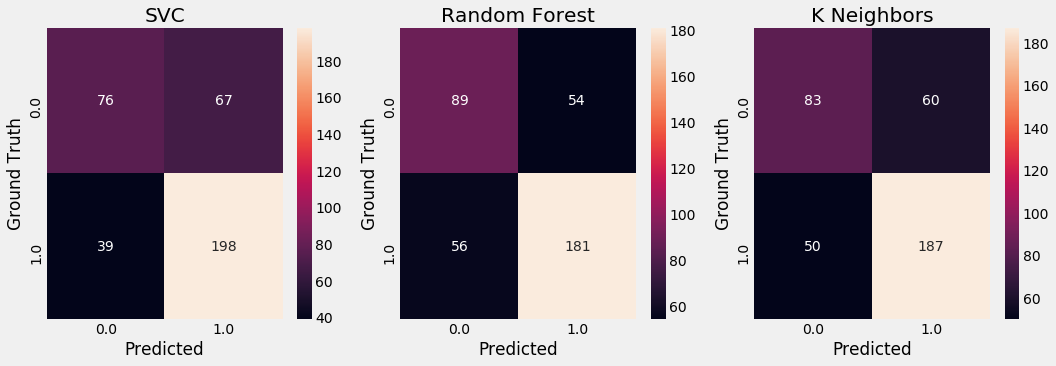

In [43]:
import seaborn as sn

# evaluamos sobre el set de prueba sobre los mejore clasificadores de cada tipo
y_test_hat_svc = svc.predict(X_test)
y_test_hat_rfc = rfc.predict(X_test)
y_test_hat_knc = knc.predict(X_test)

figs, axs = plt.subplots(1,3, figsize=(16,5))

mat_svc = {'Ground Truth': y_test, 'Predicted': y_test_hat_svc}
df_svc = pd.DataFrame(mat_svc, columns=mat_svc.keys())
cmat_svc = pd.crosstab(df_svc['Ground Truth'], df_svc['Predicted'], 
                       rownames=['Ground Truth'], colnames=['Predicted'], margins=False)

mat_rfc = {'Ground Truth': y_test, 'Predicted': y_test_hat_rfc}
df_rfc = pd.DataFrame(mat_rfc, columns=mat_rfc.keys())
cmat_rfc = pd.crosstab(df_rfc['Ground Truth'], df_rfc['Predicted'], 
                       rownames=['Ground Truth'], colnames=['Predicted'], margins=False)

mat_knc = {'Ground Truth': y_test, 'Predicted': y_test_hat_knc}
df_knc = pd.DataFrame(mat_knc, columns=mat_knc.keys())
cmat_knc = pd.crosstab(df_knc['Ground Truth'], df_knc['Predicted'], 
                       rownames=['Ground Truth'], colnames=['Predicted'], margins=False)

sn.heatmap(cmat_svc, ax=axs[0], annot=True, fmt='g')
sn.heatmap(cmat_knc, ax=axs[1], annot=True, fmt='g')
sn.heatmap(cmat_rfc, ax=axs[2], annot=True, fmt='g') 

axs[0].set_title('SVC')
axs[1].set_title('Random Forest')
axs[2].set_title('K Neighbors');

El modelo `SVC` es el mejor para identificar jugadores que llegarán a cumplir 5 años en la liga. Pero el `Random Forest`, a pesar de que deja pasar a algunos jugadores, es el mejor para saber cuáles no lo harán. Esto es importante al considerar más grave el error de tipo I. El `K Neighbors` ofrece un punto medio entre estos dos.

#### Curvas ROC y AUC

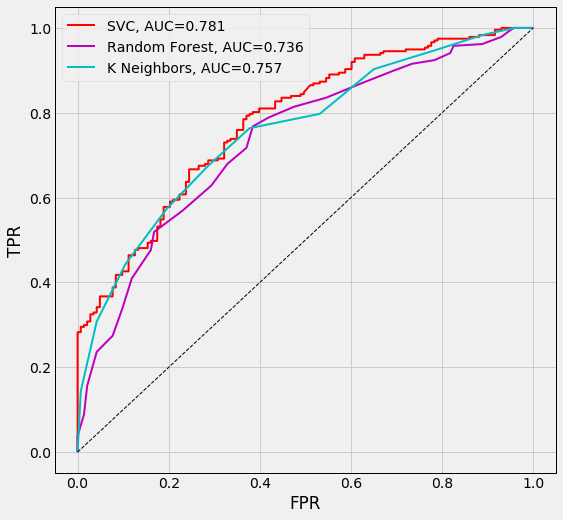

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculamos las probabilidades de pertenecer a la clase positiva para cada modelo
y_test_proba_svc = svc.predict_proba(X_test)[:,1]
y_test_proba_rfc = rfc.predict_proba(X_test)[:,1] 
y_test_proba_knc = knc.predict_proba(X_test)[:,1] 

figs, ax = plt.subplots(figsize=(8,8))

svc
fpr_svc, tpr_svc, thr_svc = roc_curve(y_test, y_test_proba_svc)
auc_svc = roc_auc_score(y_test, y_test_proba_svc)

fpr_rfc, tpr_rfc, thr_rfc = roc_curve(y_test, y_test_proba_rfc)
auc_rfc = roc_auc_score(y_test, y_test_proba_rfc)

fpr_knc, tpr_knc, thr_knc = roc_curve(y_test, y_test_proba_knc)
auc_knc = roc_auc_score(y_test, y_test_proba_knc)

ax.plot(fpr_svc, tpr_svc, color='r', label=f'SVC, AUC={auc_svc:.3f}')
ax.plot(fpr_rfc, tpr_rfc, color='m', label=f'Random Forest, AUC={auc_rfc:.3f}')
ax.plot(fpr_knc, tpr_knc, color='c', label=f'K Neighbors, AUC={auc_knc:.3f}')
ax.plot([0, 1], [0, 1], '--', color='k', linewidth=1),
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.legend();

El modelo `SVC` muestra mayor área bajo la curva que los otros dos modelos analizados.

### 6.2 Evaluación con los datos estandarizados

Habiéndo analizado los modelos para los datos originales de entrada, se aplica a continuación un proceso de estandarización, a modo de evaluar si mejora el rendimiento de los modelos aplicando este proceso.

Para la estandarización, se considera la media y desvío estándar de los datos de entrenamiento.

In [45]:
def stand(x, mean, std):
    """ Estandarización de los datos en 'x', de acuero a la media y al desvío
    estándar ingresados. """
    return (x - mean)/std

In [46]:
X_train_st = stand(X_train, np.mean(X_train, axis=0), np.std(X_train, axis=0))
X_test_st = stand(X_test, np.mean(X_train, axis=0), np.std(X_train, axis=0))

Se vuelve a fitear a los mejores modelos con los datos de entrenamiento, y luego se los prueba con los datos correspondientes.

In [47]:
svc.fit(X_train_st, y_train)
y_test_hat_st_svc = svc.predict(X_test_st)

rfc.fit(X_train_st, y_train)
y_test_hat_st_rfc = rfc.predict(X_test_st)

knc.fit(X_train_st, y_train)
y_test_hat_st_knc = knc.predict(X_test_st)

#### Matriz de confusión

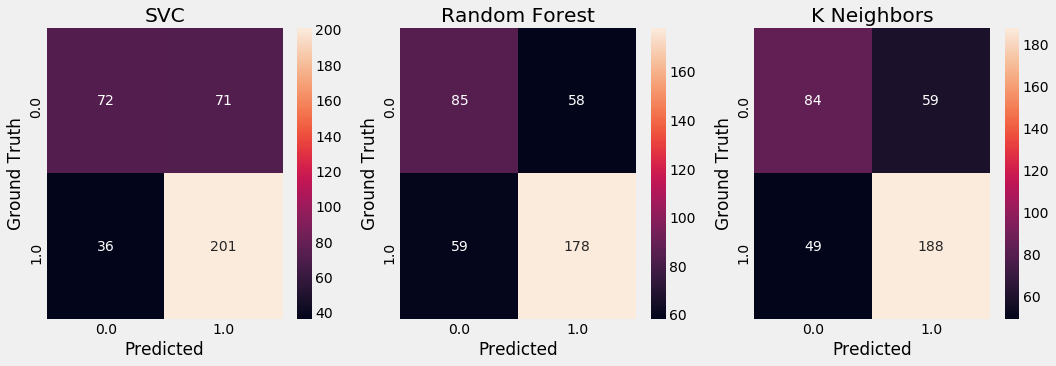

In [48]:
figs, axs = plt.subplots(1,3, figsize=(16,5))

mat_svc = {'Ground Truth': y_test, 'Predicted': y_test_hat_st_svc}
df_svc = pd.DataFrame(mat_svc, columns=mat_svc.keys())
cmat_svc = pd.crosstab(df_svc['Ground Truth'], df_svc['Predicted'], 
                       rownames=['Ground Truth'], colnames=['Predicted'], margins=False)

mat_rfc = {'Ground Truth': y_test, 'Predicted': y_test_hat_st_rfc}
df_rfc = pd.DataFrame(mat_rfc, columns=mat_rfc.keys())
cmat_rfc = pd.crosstab(df_rfc['Ground Truth'], df_rfc['Predicted'], 
                       rownames=['Ground Truth'], colnames=['Predicted'], margins=False)

mat_knc = {'Ground Truth': y_test, 'Predicted': y_test_hat_st_knc}
df_knc = pd.DataFrame(mat_knc, columns=mat_knc.keys())
cmat_knc = pd.crosstab(df_knc['Ground Truth'], df_knc['Predicted'], 
                       rownames=['Ground Truth'], colnames=['Predicted'], margins=False)

sn.heatmap(cmat_svc, ax=axs[0], annot=True, fmt='g')
sn.heatmap(cmat_knc, ax=axs[1], annot=True, fmt='g')
sn.heatmap(cmat_rfc, ax=axs[2], annot=True, fmt='g') 

axs[0].set_title('SVC')
axs[1].set_title('Random Forest')
axs[2].set_title('K Neighbors');

Puede verse que únicamente el modelo `K Neighbors` registra una mejora para los aciertos en ambas categorías.

#### Curvas ROC y AUC

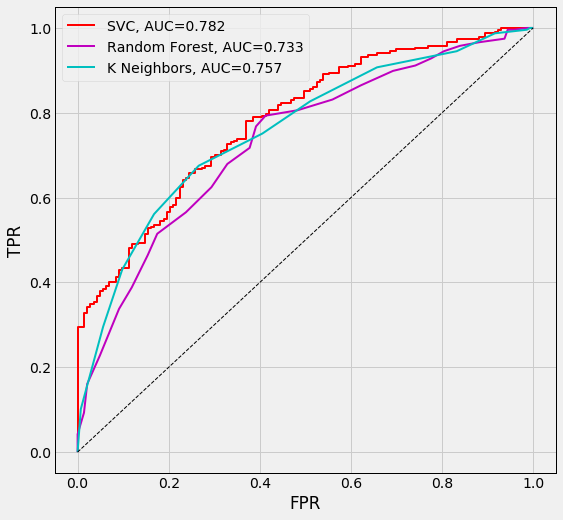

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

figs, ax = plt.subplots(figsize=(8,8))

# calculamos las probabilidades de pertenecer a la clase positiva para cada modelo
y_test_st_proba_svc = svc.predict_proba(X_test_st)[:,1]
y_test_st_proba_rfc = rfc.predict_proba(X_test_st)[:,1] 
y_test_st_proba_knc = knc.predict_proba(X_test_st)[:,1]

fpr_svc, tpr_svc, thr_svc = roc_curve(y_test, y_test_st_proba_svc)
auc_svc = roc_auc_score(y_test, y_test_st_proba_svc)

fpr_rfc, tpr_rfc, thr_rfc = roc_curve(y_test, y_test_st_proba_rfc)
auc_rfc = roc_auc_score(y_test, y_test_st_proba_rfc)

fpr_knc, tpr_knc, thr_knc = roc_curve(y_test, y_test_st_proba_knc)
auc_knc = roc_auc_score(y_test, y_test_st_proba_knc)

ax.plot(fpr_svc, tpr_svc, color='r', label=f'SVC, AUC={auc_svc:.3f}')
ax.plot(fpr_rfc, tpr_rfc, color='m', label=f'Random Forest, AUC={auc_rfc:.3f}')
ax.plot(fpr_knc, tpr_knc, color='c', label=f'K Neighbors, AUC={auc_knc:.3f}')
ax.plot([0, 1], [0, 1], '--', color='k', linewidth=1),
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.legend();

La diferencia observada con los datos originales no es significativa, al registrarse áreas bajo la curva similares.

## 7. Evaluación de métricas

Para finalizar, se muestra los resultados obtenidos para las métricas *precision* (cuántos de los positivos predichos fueron correctos), *recall* (cantidad de los positivos que fueron correctamente identificados), y *F1-Score*, que relaciona ambos parámetros en una única métrica.

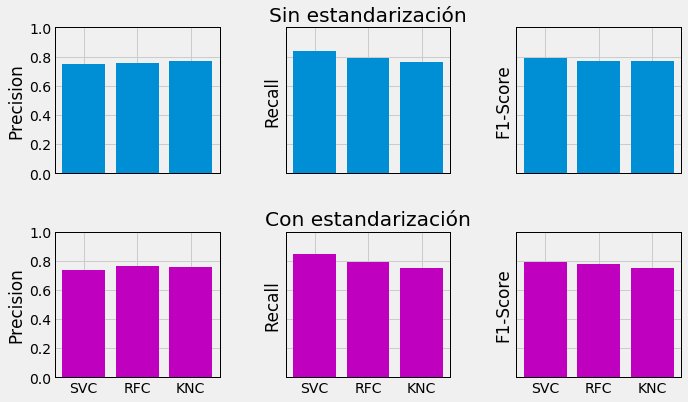

In [50]:
from sklearn.metrics import f1_score, precision_score, recall_score

svc_f1 = f1_score(y_test, y_test_hat_svc)
svc_pr = precision_score(y_test, y_test_hat_svc)
svc_re = recall_score(y_test, y_test_hat_svc)

svc_st_f1 = f1_score(y_test, y_test_hat_st_svc)
svc_st_pr = precision_score(y_test, y_test_hat_st_svc)
svc_st_re = recall_score(y_test, y_test_hat_st_svc)

rfc_f1 = f1_score(y_test, y_test_hat_rfc)
rfc_pr = precision_score(y_test, y_test_hat_rfc)
rfc_re = recall_score(y_test, y_test_hat_rfc)

rfc_st_f1 = f1_score(y_test, y_test_hat_st_rfc)
rfc_st_pr = precision_score(y_test, y_test_hat_st_rfc)
rfc_st_re = recall_score(y_test, y_test_hat_st_rfc)

knc_f1 = f1_score(y_test, y_test_hat_knc)
knc_pr = precision_score(y_test, y_test_hat_knc)
knc_re = recall_score(y_test, y_test_hat_knc)

knc_st_f1 = f1_score(y_test, y_test_hat_st_knc)
knc_st_pr = precision_score(y_test, y_test_hat_st_knc)
knc_st_re = recall_score(y_test, y_test_hat_st_knc)

figs, axs = plt.subplots(2, 3, sharex=True, sharey=True)
axs[0,0].bar(np.arange(3), [svc_pr, rfc_pr, knc_pr])
axs[0,1].bar(np.arange(3), [svc_re, rfc_re, knc_re])
axs[0,2].bar(np.arange(3), [svc_f1, rfc_f1, knc_f1])

axs[1,0].bar(np.arange(3), [svc_st_pr, rfc_st_pr, knc_st_pr], color='m')
axs[1,1].bar(np.arange(3), [svc_st_re, rfc_st_re, knc_st_re], color='m')
axs[1,2].bar(np.arange(3), [svc_st_f1, rfc_st_f1, knc_st_f1], color='m')

axs[0,1].set_title('Sin estandarización')
axs[1,1].set_title('Con estandarización')

axs[0,0].set_xticks(np.arange(3))
axs[0,0].set_xticklabels(('SVC', 'RFC', 'KNC'))
for i in (0,1):
    axs[i,0].set_ylabel('Precision')
    axs[i,1].set_ylabel('Recall')
    axs[i,2].set_ylabel('F1-Score')
axs[0,1].set_ylim([0, 1])
    
figs.subplots_adjust(hspace=0.4)
figs.subplots_adjust(wspace=0.4)

Se observa que los modelos obtienen métricas similares, observando el mejor rendimiento en el *F1-Score* para el modelo `SVC`, lo que se explica por la diferencia que obtiene en el *Recall*. A su vez, mejora su performance levemente aplicando estandarización.

Es importante considerar que fueron causados menos cantidad de errores tipo I con el modelo `Random Forest` al evaluar con los datos de prueba.